# ETL - Extração, Transformação e Carga de Dados de E-commerce

Este notebook implementa um pipeline completo de ETL (Extração, Transformação e Carga) para dados de e-commerce da Olist, preparando-os para visualização no Power BI.

## Importação de Bibliotecas

In [15]:
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import sys
import warnings

# Ignorando avisos para melhor visualização
warnings.filterwarnings('ignore')

# Adicionando diretório src ao path para importar módulos personalizados
sys.path.append('../src')
import etl_functions as etl

%matplotlib inline

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
pd.set_option('display.max_columns', None)

## 1. Extração de Dados

Nesta seção, extraímos dados de diferentes fontes. Em um cenário real, isso poderia incluir bancos de dados, APIs, arquivos CSV, Excel, etc. Para este exemplo, usaremos dados de e-commerce da Olist disponíveis no Kaggle.

In [16]:
# Definindo função para criar dados de exemplo se os arquivos não existirem
def create_sample_data():
    """Cria dados de exemplo para demonstração do ETL"""
    print("Criando dados de exemplo para demonstração...")
    
    # Criando diretório se não existir
    os.makedirs('../data/raw', exist_ok=True)
    
    # Dados de exemplo - Clientes
    customers_data = {
        'customer_id': [f'cust_{i}' for i in range(1, 101)],
        'customer_unique_id': [f'uniq_{i}' for i in range(1, 101)],
        'customer_zip_code_prefix': np.random.randint(10000, 99999, 100),
        'customer_city': np.random.choice(['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Porto Alegre', 'Brasília'], 100),
        'customer_state': np.random.choice(['SP', 'RJ', 'MG', 'RS', 'DF'], 100)
    }
    pd.DataFrame(customers_data).to_csv('../data/raw/olist_customers_dataset.csv', index=False)
    
    # Dados de exemplo - Pedidos
    orders_data = {
        'order_id': [f'order_{i}' for i in range(1, 201)],
        'customer_id': np.random.choice([f'cust_{i}' for i in range(1, 101)], 200),
        'order_status': np.random.choice(['delivered', 'shipped', 'processing', 'canceled'], 200, p=[0.7, 0.1, 0.1, 0.1]),
        'order_purchase_timestamp': pd.date_range(start='2022-01-01', end='2022-12-31', periods=200).astype(str),
        'order_approved_at': pd.date_range(start='2022-01-01', end='2022-12-31', periods=200).astype(str),
        'order_delivered_carrier_date': pd.date_range(start='2022-01-02', end='2023-01-01', periods=200).astype(str),
        'order_delivered_customer_date': pd.date_range(start='2022-01-05', end='2023-01-05', periods=200).astype(str),
        'order_estimated_delivery_date': pd.date_range(start='2022-01-10', end='2023-01-10', periods=200).astype(str)
    }
    pd.DataFrame(orders_data).to_csv('../data/raw/olist_orders_dataset.csv', index=False)
    
    # Dados de exemplo - Produtos
    products_data = {
        'product_id': [f'prod_{i}' for i in range(1, 151)],
        'product_category_name': np.random.choice(['electronics', 'furniture', 'toys', 'books', 'clothing'], 150),
        'product_name_length': np.random.randint(10, 100, 150),
        'product_description_length': np.random.randint(100, 1000, 150),
        'product_photos_qty': np.random.randint(1, 10, 150),
        'product_weight_g': np.random.randint(100, 10000, 150),
        'product_length_cm': np.random.randint(10, 100, 150),
        'product_height_cm': np.random.randint(5, 50, 150),
        'product_width_cm': np.random.randint(5, 50, 150)
    }
    pd.DataFrame(products_data).to_csv('../data/raw/olist_products_dataset.csv', index=False)
    
    # Dados de exemplo - Itens de Pedido
    order_items_data = {
        'order_id': np.random.choice([f'order_{i}' for i in range(1, 201)], 300),
        'order_item_id': np.random.randint(1, 5, 300),
        'product_id': np.random.choice([f'prod_{i}' for i in range(1, 151)], 300),
        'seller_id': np.random.choice([f'seller_{i}' for i in range(1, 51)], 300),
        'shipping_limit_date': pd.date_range(start='2022-01-01', end='2022-12-31', periods=300).astype(str),
        'price': np.random.uniform(10, 1000, 300).round(2),
        'freight_value': np.random.uniform(5, 100, 300).round(2)
    }
    pd.DataFrame(order_items_data).to_csv('../data/raw/olist_order_items_dataset.csv', index=False)
    
    # Dados de exemplo - Vendedores
    sellers_data = {
        'seller_id': [f'seller_{i}' for i in range(1, 51)],
        'seller_zip_code_prefix': np.random.randint(10000, 99999, 50),
        'seller_city': np.random.choice(['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba', 'Salvador'], 50),
        'seller_state': np.random.choice(['SP', 'RJ', 'MG', 'PR', 'BA'], 50)
    }
    pd.DataFrame(sellers_data).to_csv('../data/raw/olist_sellers_dataset.csv', index=False)
    
    # Dados de exemplo - Avaliações
    reviews_data = {
        'review_id': [f'review_{i}' for i in range(1, 201)],
        'order_id': [f'order_{i}' for i in range(1, 201)],
        'review_score': np.random.randint(1, 6, 200),
        'review_comment_title': [f'Title {i}' if i % 3 == 0 else None for i in range(1, 201)],
        'review_comment_message': [f'Message {i}' if i % 2 == 0 else None for i in range(1, 201)],
        'review_creation_date': pd.date_range(start='2022-01-01', end='2022-12-31', periods=200).astype(str),
        'review_answer_timestamp': pd.date_range(start='2022-01-02', end='2023-01-01', periods=200).astype(str)
    }
    pd.DataFrame(reviews_data).to_csv('../data/raw/olist_order_reviews_dataset.csv', index=False)
    
    # Dados de exemplo - Categorias em Português/Inglês
    category_translation_data = {
        'product_category_name': ['electronics', 'furniture', 'toys', 'books', 'clothing'],
        'product_category_name_english': ['electronics', 'furniture', 'toys', 'books', 'clothing']
    }
    pd.DataFrame(category_translation_data).to_csv('../data/raw/product_category_name_translation.csv', index=False)
    
    print("Dados de exemplo criados com sucesso!")

# Verificando se os arquivos existem, caso contrário, criando dados de exemplo
required_files = [
    '../data/raw/olist_customers_dataset.csv',
    '../data/raw/olist_orders_dataset.csv',
    '../data/raw/olist_products_dataset.csv',
    '../data/raw/olist_order_items_dataset.csv',
    '../data/raw/olist_sellers_dataset.csv',
    '../data/raw/olist_order_reviews_dataset.csv',
    '../data/raw/product_category_name_translation.csv'
]

if not all(os.path.exists(file) for file in required_files):
    create_sample_data()

In [17]:
# Extraindo dados dos arquivos CSV
print("Extraindo dados...")

# Usando a função de extração do módulo etl_functions
raw_data = etl.extract_data('../data/raw/')

# Verificando os dataframes extraídos
for name, df in raw_data.items():
    print(f"{name}: {df.shape[0]} linhas, {df.shape[1]} colunas")

Extraindo dados...
Datasets extraídos com sucesso!
customers: 100 linhas, 5 colunas
orders: 200 linhas, 8 colunas
order_items: 300 linhas, 7 colunas
products: 150 linhas, 9 colunas
sellers: 50 linhas, 4 colunas
reviews: 200 linhas, 7 colunas
category_translation: 5 linhas, 2 colunas


## 2. Transformação de Dados

Nesta seção, realizamos várias transformações nos dados brutos para prepará-los para análise e visualização.

In [18]:
# Convertendo colunas de data para datetime
print("Transformando dados...")

# Usando a função de transformação do módulo etl_functions
transformed_data = etl.transform_data(raw_data)

# Verificando os dataframes transformados
for name, df in transformed_data.items():
    print(f"{name}: {df.shape[0]} linhas, {df.shape[1]} colunas")

Transformando dados...
customers: 100 linhas, 5 colunas
orders: 200 linhas, 16 colunas
order_items: 300 linhas, 7 colunas
products: 150 linhas, 10 colunas
sellers: 50 linhas, 4 colunas
reviews: 200 linhas, 7 colunas
category_translation: 5 linhas, 2 colunas


In [19]:
# Criando tabelas dimensionais e fato para modelo estrela
print("Criando modelo dimensional...")

# Usando a função de criação de modelo dimensional do módulo etl_functions
dim_tables, fact_table = etl.create_dimensional_model(transformed_data)

# Verificando as tabelas dimensionais
print("\nTabelas Dimensionais:")
for name, df in dim_tables.items():
    print(f"{name}: {df.shape[0]} linhas, {df.shape[1]} colunas")

# Verificando a tabela fato
print(f"\nTabela Fato: {fact_table.shape[0]} linhas, {fact_table.shape[1]} colunas")

Criando modelo dimensional...

Tabelas Dimensionais:
date: 365 linhas, 10 colunas
customer: 100 linhas, 6 colunas
product: 150 linhas, 11 colunas
seller: 50 linhas, 5 colunas
order: 200 linhas, 11 colunas
review: 200 linhas, 8 colunas

Tabela Fato: 300 linhas, 9 colunas


### Visualizando Exemplos das Tabelas Dimensionais

In [20]:
# Visualizando exemplos das tabelas dimensionais
for name, df in dim_tables.items():
    print(f"\n{name} (primeiras 5 linhas):")
    display(df.head())


date (primeiras 5 linhas):


,date,year,month,day,dayofweek,quarter,is_weekend,month_name,dayofweek_name,id
0,2022-01-01,2022,1,1,5,1,1,January,Saturday,20220101
1,2022-01-02,2022,1,2,6,1,1,January,Sunday,20220102
2,2022-01-03,2022,1,3,0,1,0,January,Monday,20220103
3,2022-01-04,2022,1,4,1,1,0,January,Tuesday,20220104
4,2022-01-05,2022,1,5,2,1,0,January,Wednesday,20220105



customer (primeiras 5 linhas):


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,id
0,cust_1,uniq_1,97244,Rio de Janeiro,DF,cust_1
1,cust_2,uniq_2,37578,São Paulo,RS,cust_2
2,cust_3,uniq_3,43294,Rio de Janeiro,SP,cust_3
3,cust_4,uniq_4,49256,Porto Alegre,SP,cust_4
4,cust_5,uniq_5,41332,São Paulo,RJ,cust_5



product (primeiras 5 linhas):


,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,id
0,prod_1,toys,80,760,1,9901,98,21,16,toys,prod_1
1,prod_2,toys,72,765,3,8086,16,45,47,toys,prod_2
2,prod_3,books,78,939,7,4799,14,31,9,books,prod_3
3,prod_4,furniture,27,981,2,7334,13,11,30,furniture,prod_4
4,prod_5,toys,29,663,9,3779,58,33,6,toys,prod_5



seller (primeiras 5 linhas):


,seller_id,seller_zip_code_prefix,seller_city,seller_state,id
0,seller_1,59242,Belo Horizonte,BA,seller_1
1,seller_2,55835,Salvador,SP,seller_2
2,seller_3,80990,Rio de Janeiro,RJ,seller_3
3,seller_4,70819,Rio de Janeiro,PR,seller_4
4,seller_5,36628,São Paulo,MG,seller_5



order (primeiras 5 linhas):


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,delivery_delay_days,delivered_on_time,id
0,order_1,delivered,2022-01-01 00:00:00.000000000,2022-01-01 00:00:00.000000000,2022-01-02 00:00:00.000000000,2022-01-05 00:00:00.000000000,2022-01-10 00:00:00.000000000,4.000000,-5.0,True,order_1
1,order_2,delivered,2022-01-02 19:53:58.190954773,2022-01-02 19:53:58.190954773,2022-01-03 19:53:58.190954773,2022-01-06 20:01:12.361809045,2022-01-11 20:01:12.361809045,4.005025,-5.0,True,order_2
2,order_3,shipped,2022-01-04 15:47:56.381909547,2022-01-04 15:47:56.381909547,2022-01-05 15:47:56.381909547,2022-01-08 16:02:24.723618090,2022-01-13 16:02:24.723618090,4.010050,-5.0,True,order_3
3,order_4,delivered,2022-01-06 11:41:54.572864321,2022-01-06 11:41:54.572864321,2022-01-07 11:41:54.572864321,2022-01-10 12:03:37.085427135,2022-01-15 12:03:37.085427135,4.015075,-5.0,True,order_4
4,order_5,delivered,2022-01-08 07:35:52.763819095,2022-01-08 07:35:52.763819095,2022-01-09 07:35:52.763819095,2022-01-12 08:04:49.447236180,2022-01-17 08:04:49.447236180,4.020101,-5.0,True,order_5



review (primeiras 5 linhas):


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,id
0,review_1,order_1,3,unknown,unknown,2022-01-01 00:00:00.000000000,2022-01-02 00:00:00.000000000,review_1
1,review_2,order_2,4,unknown,Message 2,2022-01-02 19:53:58.190954773,2022-01-03 19:53:58.190954773,review_2
2,review_3,order_3,5,Title 3,unknown,2022-01-04 15:47:56.381909547,2022-01-05 15:47:56.381909547,review_3
3,review_4,order_4,1,unknown,Message 4,2022-01-06 11:41:54.572864321,2022-01-07 11:41:54.572864321,review_4
4,review_5,order_5,4,unknown,unknown,2022-01-08 07:35:52.763819095,2022-01-09 07:35:52.763819095,review_5


### Visualizando Exemplo da Tabela Fato

In [21]:
# Visualizando exemplo da tabela fato
print("\nTabela Fato (primeiras 5 linhas):")
display(fact_table.head())


Tabela Fato (primeiras 5 linhas):


,order_id,order_item_id,product_id,seller_id,customer_id,date_id,price,freight_value,review_score
0,order_130,4,prod_113,seller_30,cust_13,20220824,424.35,82.59,1
1,order_198,2,prod_11,seller_48,cust_72,20221227,702.40,21.85,3
2,order_60,3,prod_97,seller_30,cust_66,20220418,135.01,79.86,4
3,order_170,4,prod_128,seller_29,cust_92,20221106,256.80,73.65,2
4,order_187,1,prod_149,seller_9,cust_13,20221207,945.92,19.63,5


## 3. Criação de Tabelas Agregadas para Análise

Nesta seção, criamos tabelas agregadas que serão úteis para visualizações e dashboards.

In [22]:
# Criando tabelas agregadas para análise
print("Criando tabelas agregadas...")

# Usando a função de criação de tabelas agregadas do módulo etl_functions
agg_tables = etl.create_aggregated_tables(fact_table, dim_tables)

# Verificando as tabelas agregadas
for name, df in agg_tables.items():
    print(f"{name}: {df.shape[0]} linhas, {df.shape[1]} colunas")

Criando tabelas agregadas...
sales_by_date: 12 linhas, 8 colunas
sales_by_category: 5 linhas, 5 colunas
sales_by_location: 5 linhas, 5 colunas
sales_by_city: 25 linhas, 5 colunas
sales_by_seller: 50 linhas, 5 colunas
review_metrics: 5 linhas, 4 colunas


### Visualizando Exemplos das Tabelas Agregadas

In [23]:
# Visualizando exemplos das tabelas agregadas
for name, df in agg_tables.items():
    print(f"\n{name} (primeiras 5 linhas):")
    display(df.head())


sales_by_date (primeiras 5 linhas):


,year,month,quarter,order_count,total_sales,total_freight,avg_order_value,freight_percentage
0,2022,1,1,15,15632.57,1684.23,1042.171333,10.773852
1,2022,2,1,13,9708.24,1544.04,746.787692,15.904428
2,2022,3,1,12,13884.66,1466.12,1157.055000,10.559279
3,2022,4,2,9,11466.55,995.15,1274.061111,8.678722
4,2022,5,2,15,9771.28,1163.89,651.418667,11.911336



sales_by_category (primeiras 5 linhas):


,category_name,order_count,total_sales,total_freight,avg_order_value
0,books,62,37403.37,3999.18,603.280161
1,clothing,54,32015.07,3377.83,592.871667
2,electronics,48,32050.07,2572.63,667.709792
3,furniture,55,30280.21,3936.35,550.549273
4,toys,44,28012.07,2731.41,636.637955



sales_by_location (primeiras 5 linhas):


,state,order_count,total_sales,total_freight,avg_order_value
0,DF,27,21821.04,2669.76,808.186667
1,MG,30,32497.01,3074.97,1083.233667
2,RJ,41,40532.89,4130.62,988.607073
3,RS,26,27146.38,2784.42,1044.091538
4,SP,34,37763.47,3957.63,1110.690294



sales_by_city (primeiras 5 linhas):


,state,city,order_count,total_sales,location
0,DF,Belo Horizonte,4,3324.42,Belo Horizonte (DF)
1,DF,Brasília,1,549.67,Brasília (DF)
2,DF,Porto Alegre,11,7000.27,Porto Alegre (DF)
3,DF,Rio de Janeiro,4,5617.66,Rio de Janeiro (DF)
4,DF,São Paulo,7,5329.02,São Paulo (DF)



sales_by_seller (primeiras 5 linhas):


,seller_id,order_count,total_sales,total_freight,avg_order_value
0,seller_1,4,2741.65,259.10,685.412500
1,seller_10,6,1820.75,323.16,303.458333
2,seller_11,6,4922.86,286.28,820.476667
3,seller_12,7,3774.39,395.24,539.198571
4,seller_13,3,1065.68,145.54,355.226667



review_metrics (primeiras 5 linhas):


,review_score,order_count,total_sales,nps
0,1,30,31445.81,-37.341772
1,2,33,27687.67,-37.341772
2,3,26,35337.25,-37.341772
3,4,39,40165.64,-37.341772
4,5,30,25124.42,-37.341772


## 4. Carga de Dados

Nesta seção, salvamos os dados transformados e agregados em formatos adequados para uso no Power BI.

In [24]:
# Salvando dados transformados
print("Salvando dados transformados...")

# Criando diretório para dados transformados se não existir
os.makedirs('../data/transformed', exist_ok=True)

# Salvando tabelas dimensionais
for name, df in dim_tables.items():
    df.to_csv(f'../data/transformed/dim_{name}.csv', index=False)
    print(f"Tabela dimensional '{name}' salva com sucesso.")

# Salvando tabela fato
fact_table.to_csv('../data/transformed/fact_sales.csv', index=False)
print("Tabela fato 'sales' salva com sucesso.")

# Salvando tabelas agregadas
for name, df in agg_tables.items():
    df.to_csv(f'../data/transformed/agg_{name}.csv', index=False)
    print(f"Tabela agregada '{name}' salva com sucesso.")

Salvando dados transformados...
Tabela dimensional 'date' salva com sucesso.
Tabela dimensional 'customer' salva com sucesso.
Tabela dimensional 'product' salva com sucesso.
Tabela dimensional 'seller' salva com sucesso.
Tabela dimensional 'order' salva com sucesso.
Tabela dimensional 'review' salva com sucesso.
Tabela fato 'sales' salva com sucesso.
Tabela agregada 'sales_by_date' salva com sucesso.
Tabela agregada 'sales_by_category' salva com sucesso.
Tabela agregada 'sales_by_location' salva com sucesso.
Tabela agregada 'sales_by_city' salva com sucesso.
Tabela agregada 'sales_by_seller' salva com sucesso.
Tabela agregada 'review_metrics' salva com sucesso.


In [25]:
# Salvando dados em formato parquet para melhor desempenho no Power BI
print("\nSalvando dados em formato parquet...")

# Salvando tabelas dimensionais em parquet
for name, df in dim_tables.items():
    df.to_parquet(f'../data/transformed/dim_{name}.parquet')
    print(f"Tabela dimensional '{name}' salva em parquet com sucesso.")

# Salvando tabela fato em parquet
fact_table.to_parquet('../data/transformed/fact_sales.parquet')
print("Tabela fato 'sales' salva em parquet com sucesso.")

# Salvando tabelas agregadas em parquet
for name, df in agg_tables.items():
    df.to_parquet(f'../data/transformed/agg_{name}.parquet')
    print(f"Tabela agregada '{name}' salva em parquet com sucesso.")


Salvando dados em formato parquet...
Tabela dimensional 'date' salva em parquet com sucesso.
Tabela dimensional 'customer' salva em parquet com sucesso.
Tabela dimensional 'product' salva em parquet com sucesso.
Tabela dimensional 'seller' salva em parquet com sucesso.
Tabela dimensional 'order' salva em parquet com sucesso.
Tabela dimensional 'review' salva em parquet com sucesso.
Tabela fato 'sales' salva em parquet com sucesso.
Tabela agregada 'sales_by_date' salva em parquet com sucesso.
Tabela agregada 'sales_by_category' salva em parquet com sucesso.
Tabela agregada 'sales_by_location' salva em parquet com sucesso.
Tabela agregada 'sales_by_city' salva em parquet com sucesso.
Tabela agregada 'sales_by_seller' salva em parquet com sucesso.
Tabela agregada 'review_metrics' salva em parquet com sucesso.


## 5. Verificação dos Dados Transformados

Nesta seção, realizamos algumas verificações para garantir que os dados foram transformados corretamente.

In [26]:
# Verificando integridade dos dados
print("Verificando integridade dos dados...")

# Verificando se todas as chaves estrangeiras na tabela fato existem nas tabelas dimensionais
for dim_name, dim_df in dim_tables.items():
    if f'{dim_name}_id' in fact_table.columns:
        fk_values = fact_table[f'{dim_name}_id'].unique()
        pk_values = dim_df['id'].unique()
        missing_keys = set(fk_values) - set(pk_values)
        if missing_keys:
            print(f"ERRO: Chaves estrangeiras ausentes na dimensão {dim_name}: {missing_keys}")
        else:
            print(f"OK: Todas as chaves estrangeiras para a dimensão {dim_name} estão presentes.")

# Verificando valores nulos em colunas importantes
print("\nVerificando valores nulos em colunas importantes da tabela fato:")
null_counts = fact_table[['order_id', 'customer_id', 'product_id', 'seller_id', 'date_id', 'price', 'freight_value']].isnull().sum()
print(null_counts)

# Verificando consistência dos dados agregados
print("\nVerificando consistência dos dados agregados:")
total_sales_fact = fact_table['price'].sum()
total_sales_agg = agg_tables['sales_by_date']['total_sales'].sum()
print(f"Total de vendas na tabela fato: {total_sales_fact:.2f}")
print(f"Total de vendas na tabela agregada por data: {total_sales_agg:.2f}")
print(f"Diferença: {abs(total_sales_fact - total_sales_agg):.2f}")

Verificando integridade dos dados...
OK: Todas as chaves estrangeiras para a dimensão date estão presentes.
OK: Todas as chaves estrangeiras para a dimensão customer estão presentes.
OK: Todas as chaves estrangeiras para a dimensão product estão presentes.
OK: Todas as chaves estrangeiras para a dimensão seller estão presentes.
OK: Todas as chaves estrangeiras para a dimensão order estão presentes.

Verificando valores nulos em colunas importantes da tabela fato:
order_id         0
customer_id      0
product_id       0
seller_id        0
date_id          0
price            0
freight_value    0
dtype: int64

Verificando consistência dos dados agregados:
Total de vendas na tabela fato: 159760.79
Total de vendas na tabela agregada por data: 159760.79
Diferença: 0.00


## 6. Visualização Prévia para o Dashboard

Nesta seção, criamos algumas visualizações preliminares que servirão de base para o dashboard no Power BI.

Criando visualizações preliminares...


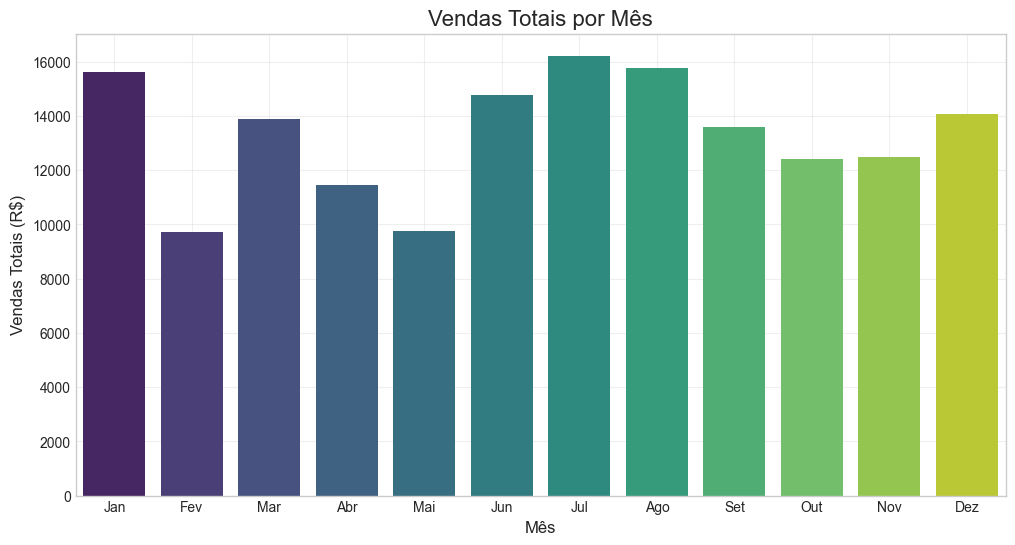

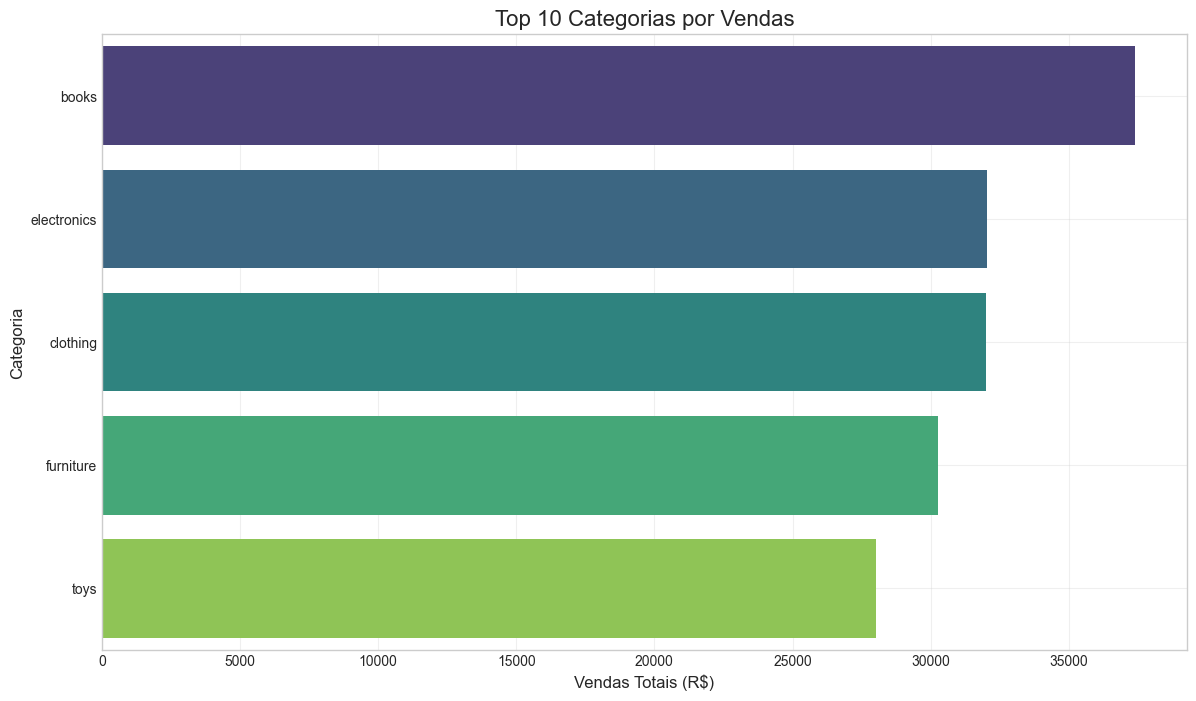

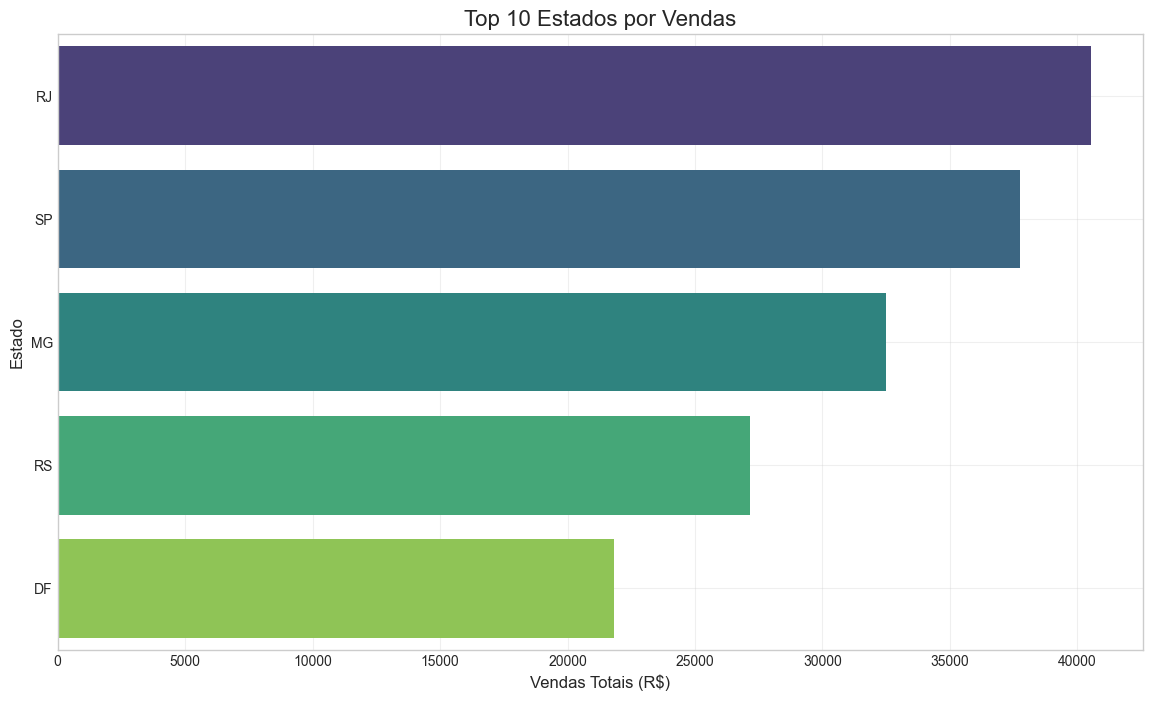

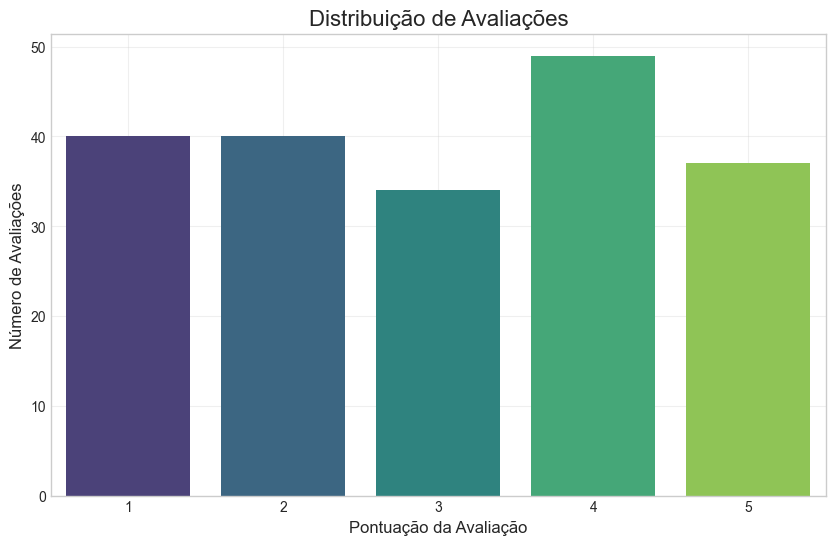

In [27]:
# Criando visualizações preliminares
print("Criando visualizações preliminares...")

# Criando diretório para figuras se não existir
os.makedirs('../reports/dashboard', exist_ok=True)

# Vendas por mês
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_sales', data=agg_tables['sales_by_date'], palette='viridis')
plt.title('Vendas Totais por Mês', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Vendas Totais (R$)', fontsize=12)
plt.xticks(range(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True, alpha=0.3)
plt.savefig('../reports/dashboard/sales_by_month.png', dpi=300, bbox_inches='tight')
plt.show()

# Vendas por categoria
plt.figure(figsize=(14, 8))
category_sales = agg_tables['sales_by_category'].sort_values('total_sales', ascending=False).head(10)
sns.barplot(y='category_name', x='total_sales', data=category_sales, palette='viridis')
plt.title('Top 10 Categorias por Vendas', fontsize=16)
plt.xlabel('Vendas Totais (R$)', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('../reports/dashboard/sales_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

# Vendas por estado
plt.figure(figsize=(14, 8))
state_sales = agg_tables['sales_by_location'].sort_values('total_sales', ascending=False).head(10)
sns.barplot(y='state', x='total_sales', data=state_sales, palette='viridis')
plt.title('Top 10 Estados por Vendas', fontsize=16)
plt.xlabel('Vendas Totais (R$)', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('../reports/dashboard/sales_by_state.png', dpi=300, bbox_inches='tight')
plt.show()

# Distribuição de avaliações
plt.figure(figsize=(10, 6))
sns.countplot(x='review_score', data=dim_tables['review'], palette='viridis')
plt.title('Distribuição de Avaliações', fontsize=16)
plt.xlabel('Pontuação da Avaliação', fontsize=12)
plt.ylabel('Número de Avaliações', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('../reports/dashboard/review_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Criação de Imagem de Exemplo do Dashboard

Nesta seção, criamos uma imagem de exemplo do dashboard que será incluída no README do projeto.

Criando imagem de exemplo do dashboard...


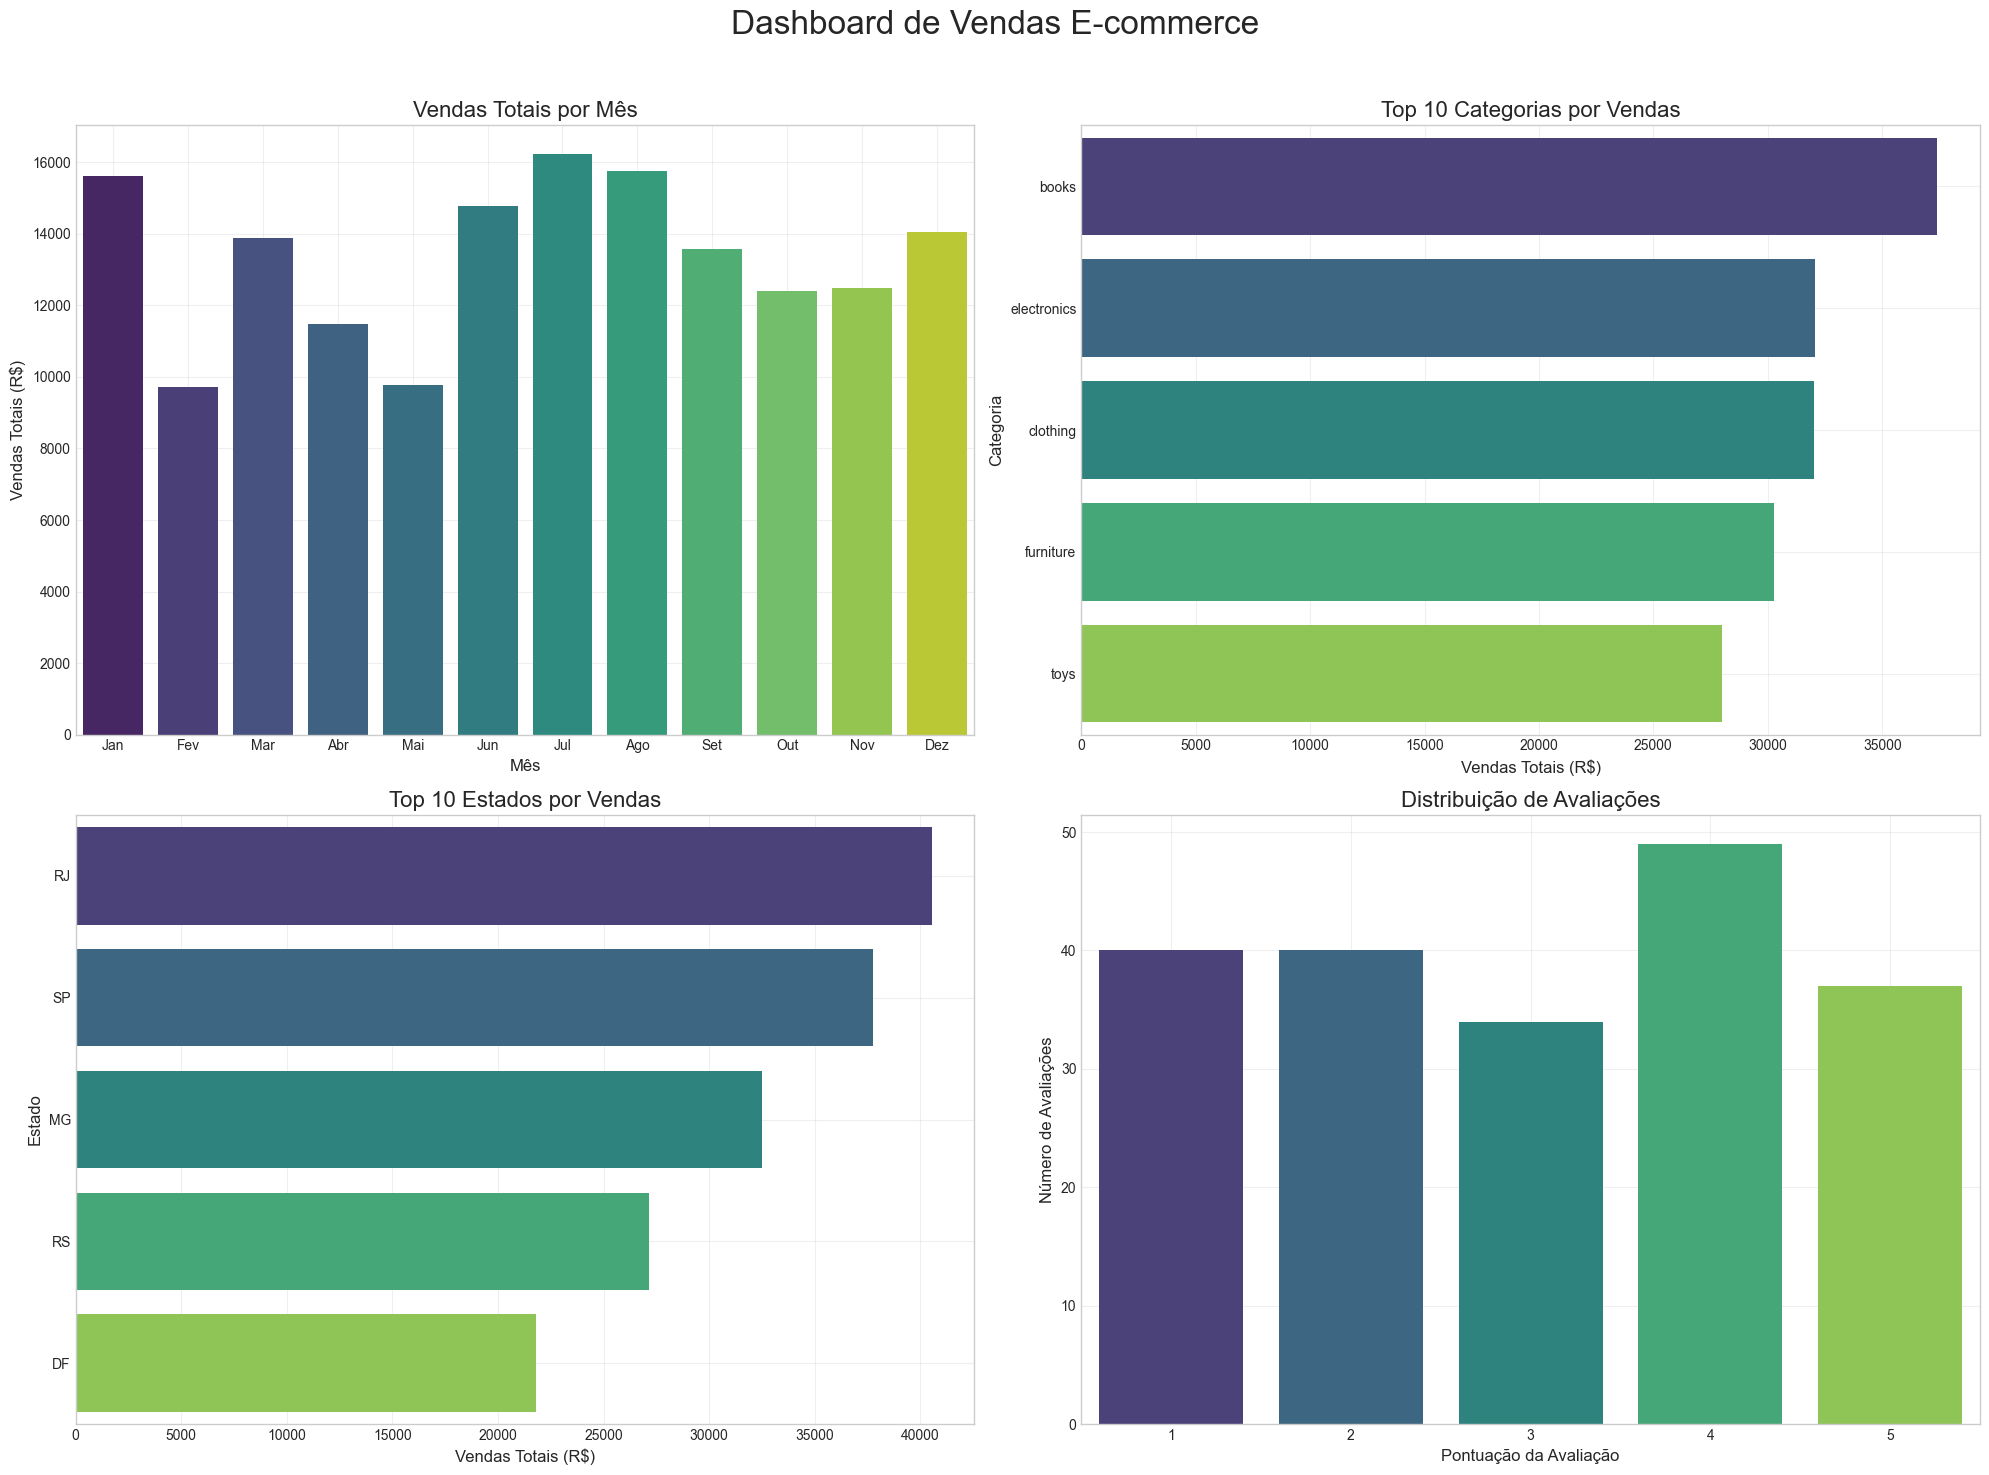

In [28]:
# Criando uma imagem de exemplo do dashboard
print("Criando imagem de exemplo do dashboard...")

# Criando um layout de dashboard simples com as visualizações criadas
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Vendas por mês
sns.barplot(x='month', y='total_sales', data=agg_tables['sales_by_date'], palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Vendas Totais por Mês', fontsize=16)
axes[0, 0].set_xlabel('Mês', fontsize=12)
axes[0, 0].set_ylabel('Vendas Totais (R$)', fontsize=12)
axes[0, 0].set_xticks(range(12))
axes[0, 0].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
axes[0, 0].grid(True, alpha=0.3)

# Vendas por categoria
category_sales = agg_tables['sales_by_category'].sort_values('total_sales', ascending=False).head(10)
sns.barplot(y='category_name', x='total_sales', data=category_sales, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Categorias por Vendas', fontsize=16)
axes[0, 1].set_xlabel('Vendas Totais (R$)', fontsize=12)
axes[0, 1].set_ylabel('Categoria', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Vendas por estado
state_sales = agg_tables['sales_by_location'].sort_values('total_sales', ascending=False).head(10)
sns.barplot(y='state', x='total_sales', data=state_sales, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Estados por Vendas', fontsize=16)
axes[1, 0].set_xlabel('Vendas Totais (R$)', fontsize=12)
axes[1, 0].set_ylabel('Estado', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)

# Distribuição de avaliações
sns.countplot(x='review_score', data=dim_tables['review'], palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Distribuição de Avaliações', fontsize=16)
axes[1, 1].set_xlabel('Pontuação da Avaliação', fontsize=12)
axes[1, 1].set_ylabel('Número de Avaliações', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

# Adicionando título geral
fig.suptitle('Dashboard de Vendas E-commerce', fontsize=24, y=0.98)

# Ajustando layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Salvando imagem do dashboard
plt.savefig('../reports/dashboard/dashboard_preview.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Instruções para Integração com Power BI

Nesta seção, fornecemos instruções para integrar os dados transformados com o Power BI.

### Passos para Integração com Power BI

1. **Abra o Power BI Desktop**

2. **Importe os dados transformados**:
   - Clique em "Obter Dados" > "Arquivo" > "Pasta"
   - Navegue até a pasta `data/transformed`
   - Selecione os arquivos .parquet (recomendado) ou .csv

3. **Configure as relações entre tabelas**:
   - Vá para a visualização "Modelo"
   - Crie relações entre a tabela fato e as tabelas dimensionais usando as chaves correspondentes:
     - fact_sales.customer_id → dim_customer.id
     - fact_sales.product_id → dim_product.id
     - fact_sales.seller_id → dim_seller.id
     - fact_sales.date_id → dim_date.id
     - fact_sales.order_id → dim_order.id

4. **Crie medidas calculadas**:
   - Clique com o botão direito na tabela fact_sales > "Nova medida"
   - Crie medidas como:
     ```
     Total Vendas = SUM(fact_sales[price])
     Total Frete = SUM(fact_sales[freight_value])
     Ticket Médio = DIVIDE(SUM(fact_sales[price]), DISTINCTCOUNT(fact_sales[order_id]))
     ```

5. **Crie visualizações**:
   - Gráfico de barras para vendas por categoria
   - Gráfico de linhas para tendência de vendas ao longo do tempo
   - Mapa para vendas por estado
   - Cartões para KPIs como total de vendas, número de pedidos, ticket médio
   - Gráfico de pizza para distribuição de avaliações

6. **Adicione segmentações de dados**:
   - Adicione segmentações por período, categoria, estado, etc.

7. **Formate o dashboard**:
   - Organize as visualizações
   - Adicione título e descrições
   - Aplique um tema consistente

8. **Salve o arquivo .pbix**:
   - Salve na pasta `reports/dashboard`

## 9. Conclusão

Neste notebook, implementamos um pipeline completo de ETL para dados de e-commerce, incluindo:

1. **Extração** de dados de múltiplas fontes
2. **Transformação** dos dados brutos em um modelo dimensional (estrela)
3. **Criação** de tabelas agregadas para análise
4. **Carga** dos dados transformados em formatos adequados para o Power BI
5. **Verificação** da integridade dos dados
6. **Visualização** preliminar para o dashboard
7. **Instruções** para integração com Power BI

Os dados estão prontos para serem importados no Power BI para criar um dashboard interativo e completo de análise de vendas de e-commerce.